# Short term forecast on Covid-19 active cases by ARIMA model

A popular and widely used statistical method for time series forecasting is the ARIMA model.

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a class of model that captures a suite of different standard temporal structures in time series data.

#### IMPORT THE REQUIRED LIBRARIES

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#### IMPORT THE TIME SERIES DATASET

In [17]:
data=pd.read_csv('time-series-19-covid-combined.csv')

In [18]:
# Predictive model for US
data_US=data[data['Country/Region']=='US'].reset_index(drop=True)

In [19]:
data_US1=data_US[['Date','Confirmed']]

In [20]:
data_US1.head()

,Date,Confirmed
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,5


In [21]:
data_US1.tail()

,Date,Confirmed
308,2020-11-25,12772653
309,2020-11-26,12883264
310,2020-11-27,13088821
311,2020-11-28,13244417
312,2020-11-29,13383320


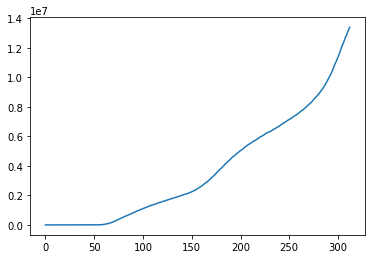

In [22]:
plt.plot(data_US1['Confirmed'])

In [23]:
data_US1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       313 non-null    object
 1   Confirmed  313 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.0+ KB


###### Data Preprocessing: While working with time series data in Python, it’s important to always ensure that dates are used as index values and are understood by Python as true “date” object. We can do this by using pandas datestamp or to_datetime method.

In [24]:
data_US1['Date']=pd.to_datetime(data_US1['Date'])

<ipython-input-24-3f1f18826d51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_US1['Date']=pd.to_datetime(data_US1['Date'])


In [25]:
data_US1=data_US1.set_index('Date')

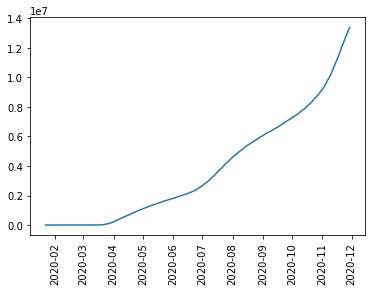

In [26]:
plt.plot(data_US1['Confirmed'])
plt.xticks(rotation=90)
plt.show()

#### Inference:Above graph indicating the trend of the confirmed cases from January-22-2020 to November-29-2020.


#### Decomposition is a forecasting technique that separates or decomposes historical data into different components and uses them to create a forecast that is more accurate than a simple trend line.A time series can be thought of as being made up of 4 components:

      Trend: The increasing or decreasing value in the series.
      
      Seasonality: The repeating short-term cycle in the series.
      
      Residuals: The random variation in the series.


In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_US1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

<ipython-input-28-117b8647fa2a>:20: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  plt.tight_layout()  #Automatically adjust subplot parameters to give specified padding.


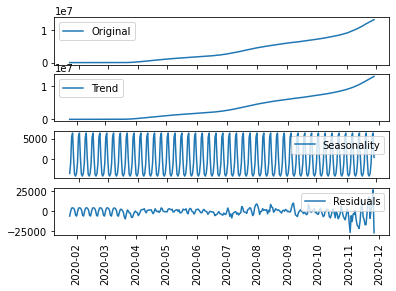

In [28]:
plt.subplot(4,1,1)
plt.plot(data_US1, label='Original')
plt.legend(loc='best')
plt.xticks(rotation=90)

plt.subplot(4,1,2)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.xticks(rotation=90)

plt.subplot(4,1,3)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.xticks(rotation=90)

plt.subplot(4,1,4)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.xticks(rotation=90)
plt.tight_layout()  #Automatically adjust subplot parameters to give specified padding.

In [29]:
#!pip install pmdarima


In [30]:
# Create Training and Test
train = data_US1['Confirmed'][:290]
test = data_US1['Confirmed'][290:]

#### MODEL BUILDING

In [31]:
import pmdarima as pm

In [41]:
model = pm.auto_arima(train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      trace=True,
                      error_action='ignore',suppress_warnings=True,stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=5824.402, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=5832.093, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=5830.144, Time=0.06 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=5828.328, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=5831.621, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=5816.497, Time=0.27 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=5826.325, Time=0.08 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=5807.955, Time=0.31 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=5818.925, Time=0.11 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=5817.417, Time=0.59 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=5809.991, Time=0.27 sec

Best model:  ARIMA(3,2,1)(0,0,0)[0] intercept
Total fit time: 3.049 seconds


#### ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration.This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

AR(p): Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.

I(d): Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.

MA(q): Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

Each of these components are explicitly specified in the model as a parameter. A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

The parameters of the ARIMA model are defined as follows:

p: The number of lag observations included in the model, also called the lag order.

d: The number of times that the raw observations are differenced, also called the degree of differencing.

q: The size of the moving average window, also called the order of moving average.


AIC-Akaike's Information Criterion (AIC), which was useful in selecting predictors for regression, is also useful for determining the order of an ARIMA model.

BIC-In statistics, the Bayesian information criterion (BIC) or Schwarz criterion (also SBC, SBIC) is a criterion for model selection among a finite set of models. It is based, in part, on the likelihood function, and it is closely related to Akaike information criterion (AIC).

The above given model is Auto ARIMA model. The advantage of using Auto ARIMA over the ARIMA model is thatafter data preprocessing step we can skip the next steps & directly fit our model. It usesthe AIC (Akaike Information Criterion) & BIC(Bayesian Information Criterion) valuesgenerated by trying different combinations of p,q & d values to fit the model.

INFERENCE:  p,d,q--- 3,2,1
            
            AIC value-5807.955
            
            BIC Value-5829.933

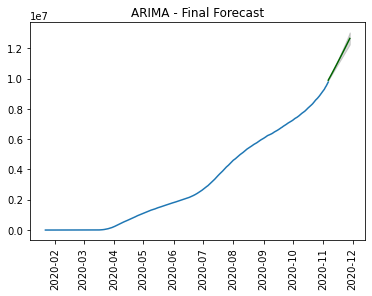

In [33]:
# Forecast
n_periods = len(test)
fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(train.index[-1], periods = n_periods)

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("ARIMA - Final Forecast")
plt.xticks(rotation=90)
plt.show()

#### Making predictions about the future is called extrapolation in the classical statistical handling of time series data. Forecasting involves taking models fit on historical data and using them to predict future observations.

Inference:Blue line are actual cases green line portion is predicted cases for the last 23 days

In [35]:
len(test)

23

In [36]:
# Confirmed case count predicted by our model for last 23 days
fitted.round()

array([ 9893660., 10010872., 10127956., 10247004., 10368252., 10490516.,
       10613026., 10735677., 10858780., 10982588., 11107150., 11232384.,
       11358209., 11484607., 11611597., 11739205., 11867437., 11996290.,
       12125755., 12255830., 12386516., 12517815., 12649728.])

In [37]:
# Actual confirmed case count forlast 23 days as per data
np.array(test)

array([ 9899480, 10009386, 10130752, 10268446, 10411994, 10573242,
       10750810, 10917519, 11053304, 11211070, 11371585, 11541986,
       11729949, 11925959, 12104032, 12246766, 12418228, 12591163,
       12772653, 12883264, 13088821, 13244417, 13383320], dtype=int64)

In [38]:
#Model Error in terms of MAPE

mape=np.mean(abs(test-fitted)/test)*100
mape

2.7728729475662512

#### MAPE (Mean absolute percentage error). It considers actual values fed into model and fitted values from the model and calculates absolute difference between the two as a percentage of actual value and finally calculates mean of that.

## Model Mean Absolute Percentage error is only by 2.7%, which is reasonably good

### If you like the work don't forget to upvote